 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/chsurya921/Telco-Customer-Churn/refs/heads/main/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Remove Unnecessary Column

In [ ]:
df.drop("customerID", axis=1, inplace=True)

Convert TotalCharges to Numeric

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

/tmp/ipython-input-617195598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


Encode Target Variable

In [ ]:
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

Encode Categorical Columns

In [ ]:
le = LabelEncoder()

for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

Exploratory Data Analysis (EDA)

Churn Distribution

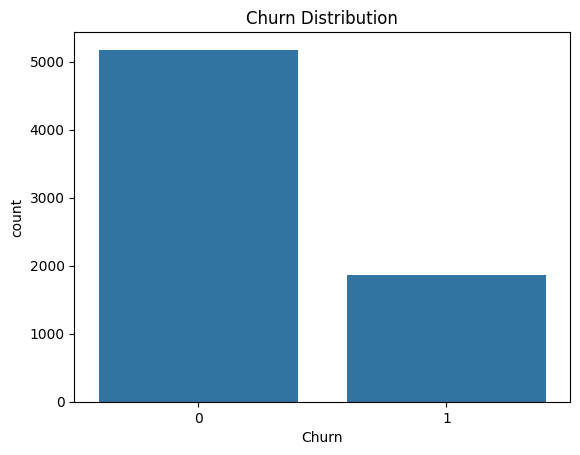

In [ ]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

Correlation Heatmap

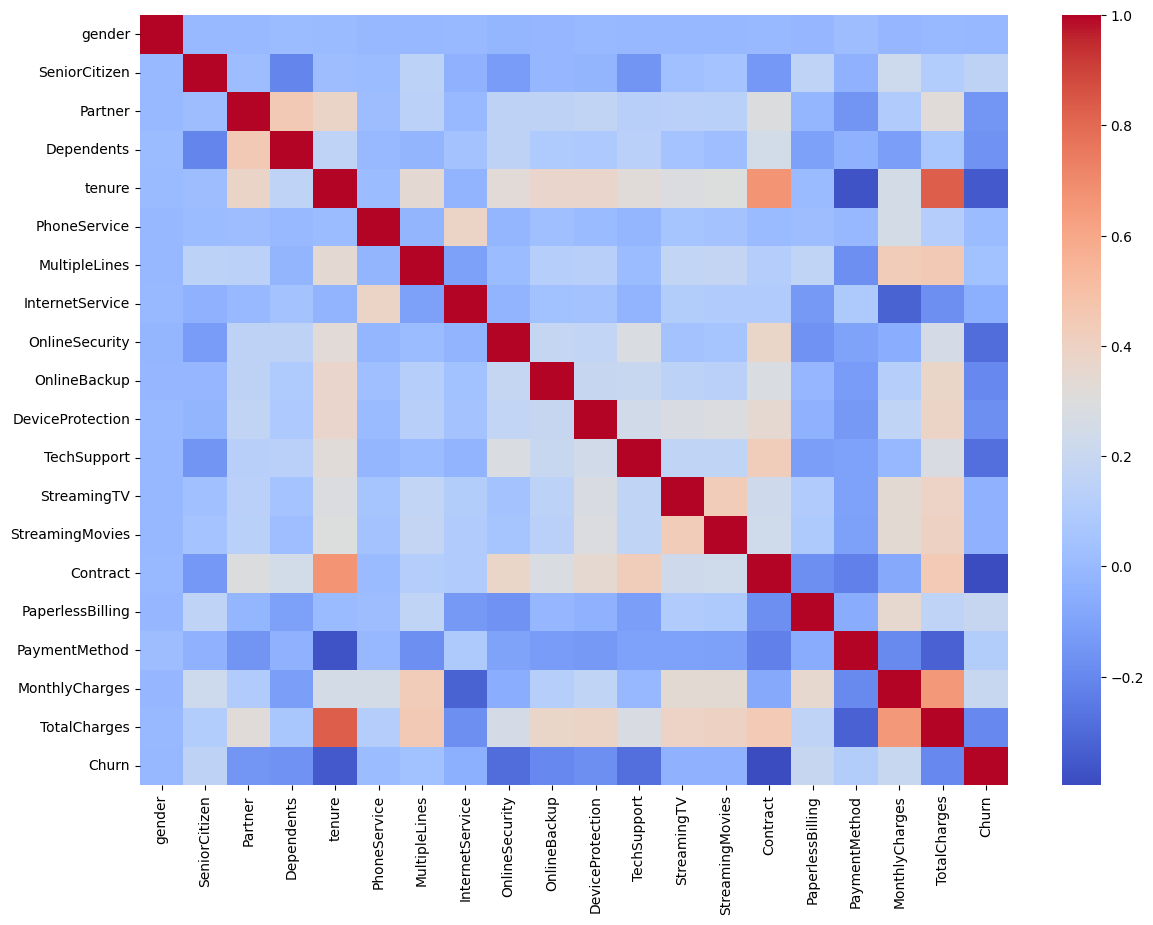

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

Tenure vs Churn

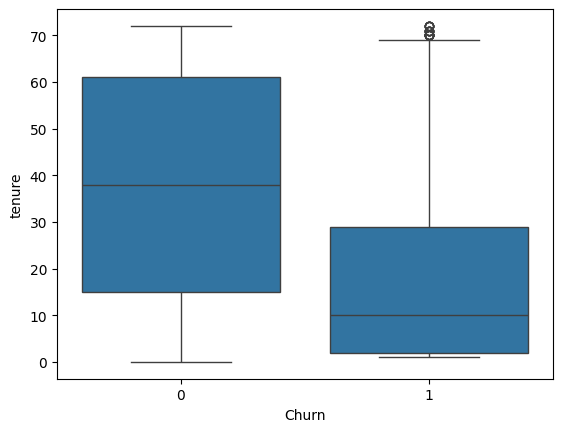

In [ ]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.show()

Monthly Charges vs Churn

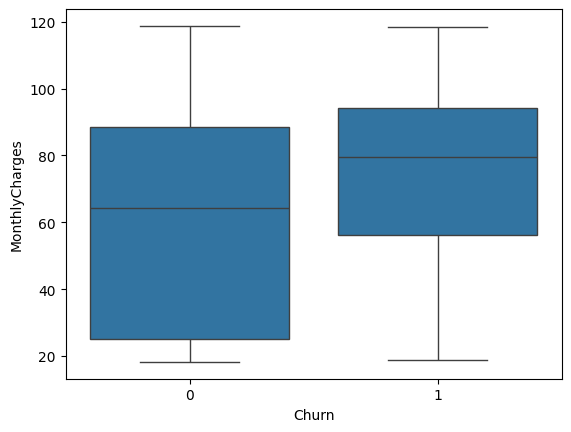

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()

Feature Selection

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model 1 — Baseline Model (Logistic Regression)

In [ ]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

baseline_pred = baseline_model.predict(X_test)

Baseline Evaluation

In [ ]:
print("Baseline Accuracy:", accuracy_score(y_test, baseline_pred))

print(confusion_matrix(y_test, baseline_pred))
print(classification_report(y_test, baseline_pred))

Baseline Accuracy: 0.815471965933286
[[933 103]
 [157 216]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



Model 2 — Improved Model (Random Forest)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

Improved Model Evaluation

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.808374733853797
[[947  89]
 [181 192]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Error Analysis

Confusion Matrix Visualization

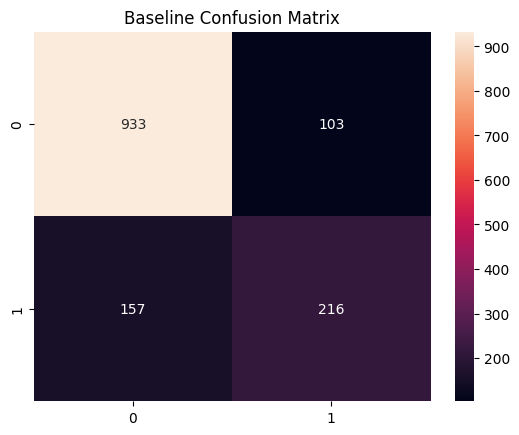

In [ ]:
sns.heatmap(confusion_matrix(y_test, baseline_pred),
            annot=True, fmt="d")
plt.title("Baseline Confusion Matrix")
plt.show()

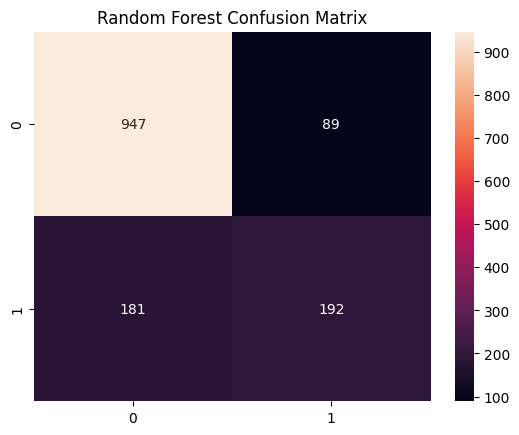

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred),
            annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()